In [20]:
import networkx
import math
import copy
import matplotlib.pyplot as plt
from collections import Counter
import pickle
from tqdm import tqdm

In [21]:
G1 = networkx.Graph()
G2 = networkx.Graph()
count_total_nodes = 10000
#First adding 10000 nodes to the graph
for i in range(count_total_nodes):
    G1.add_node(str(i))
    G2.add_node(str(i))


#Reading the edge list of G1 and adding the edges
fp = open("g1.edgelist.txt", "r")
text = fp.read()
list_lines = text.split("\n")
list_triples = [a.split() for a in list_lines]
for x in list_triples:
    G1.add_edge(x[0], x[1])

#Reading the edge list of G2 and adding the edges
fp = open("g2.edgelist.txt", "r")
text = fp.read()
list_lines = text.split("\n")
list_triples = [a.split() for a in list_lines]
for x in list_triples:
    G2.add_edge(x[0], x[1])

# print(G1.number_of_nodes())
# print(G1.number_of_edges())
# print(G2.number_of_nodes())
# print(G2.number_of_edges())
dict_support = {}
#Now initializing each node with the candidate it supports
for i in range(count_total_nodes):
    n = str(i)
    len_n = len(n)
    last_digit = n[len_n - 1]
    dict_temp = {}
    if last_digit == '0' or last_digit == '1' or last_digit == '2' or last_digit == '3':
        dict_temp['support'] = 'B'
    elif last_digit == '4' or last_digit == '5' or last_digit == '6' or last_digit == '7':
        dict_temp['support'] = 'A'
    else:
        dict_temp['support'] = 'U'
    dict_support[n] = dict_temp
networkx.set_node_attributes(G1, dict_support)
networkx.set_node_attributes(G2, dict_support)

In [22]:
list_pairs_G1 = [[node, val] for (node, val) in G1.degree()]
list_pairs_G1 = sorted(list_pairs_G1, key = lambda x:x[1], reverse=True)
list_pairs_G2 = [[node, val] for (node, val) in G2.degree()]
list_pairs_G2 = sorted(list_pairs_G2, key = lambda x:x[1], reverse=True)

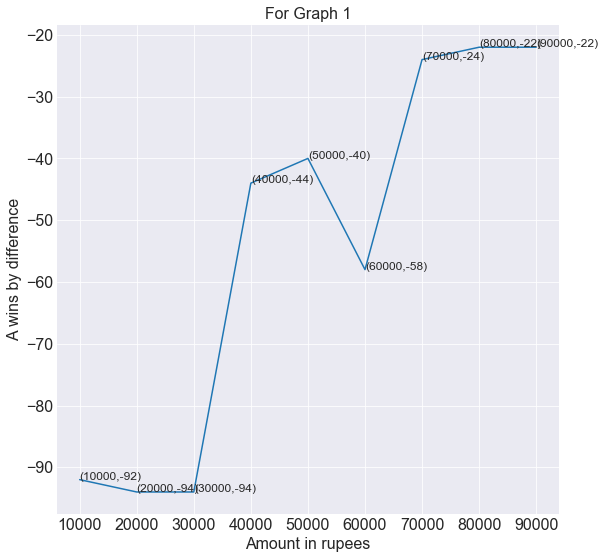

Not possible for A to win election even after using max amount i.e Rs. 90000


In [23]:
#Doing for graph G1
k_amount = 0
x_cord = []
y_cord = []
no_of_iterations = 7
initial_G1 = networkx.Graph()
initial_G1 = copy.deepcopy(G1)
list_nodes_excluded = []
for it_cost in range(9):
    global_alternate = 'A'
    list_nodes_excluded = []
    G1 = copy.deepcopy(initial_G1)
    k_amount += 10000
    x_cord.append(k_amount)
    count_additional_voter = int(k_amount / 10000)
    for v in range(count_additional_voter):
        curr_voter = list_pairs_G1[v][0]
        list_nodes_excluded.append(curr_voter)
        G1.nodes[curr_voter]['support'] = 'A'
    
    list_undecided = []
    for ab in range(0, count_total_nodes):
        cn = str(ab)
        if G1.nodes[cn]['support'] == 'U':
            list_undecided.append(cn)
            
    for it_cnt in range(no_of_iterations):
        for curr_node in list_undecided:
            list_neighbours = [n for n in G1.neighbors(curr_node)]
#             list_neighbours = list(G1.neighbours(curr_node))
            list_supporting = [G1.nodes[x]['support'] for x in list_neighbours]
            cntr_supporting = Counter(list_supporting)
            count_A = cntr_supporting['A']
            count_B = cntr_supporting['B']
            if count_A > count_B:
                G1.nodes[curr_node]['support'] = 'A'
            elif count_B > count_A:
                G1.nodes[curr_node]['support'] = 'B'
            else:
                G1.nodes[curr_node]['support'] = global_alternate
                if global_alternate == 'A':
                    global_alternate = 'B'
                else:
                    global_alternate = 'A'

    list_all_supporting_1 = [G1.nodes[y]['support'] for y in G1.nodes()]
    counter_all_supporting_1 = Counter(list_all_supporting_1)
    cnt_A_1 = counter_all_supporting_1['A']
    cnt_B_1 = counter_all_supporting_1['B']
    difference_winning = cnt_A_1 - cnt_B_1
    y_cord.append(difference_winning)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (9, 9))
plt.title('For Graph 1', fontsize = 16) 
plt.plot(x_cord, y_cord)
combined_points = zip(x_cord, y_cord)
for x_val, y_val in combined_points:
    plt.text(x_val, y_val, '({},{})'.format(x_val,y_val), fontsize = 12)
plt.xlabel('Amount in rupees', fontsize = 16)
plt.ylabel('A wins by difference', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

flag_enter = 0
for i in range(len(y_cord)):
    if y_cord[i] > 0:
        print(f"Minimum amount that can be spent for A to win elections in Graph 1 = {x_cord[i]}")
        flag_enter = 1
        break
if flag_enter == 0:
    print("Not possible for A to win election even after using max amount i.e Rs. 90000")


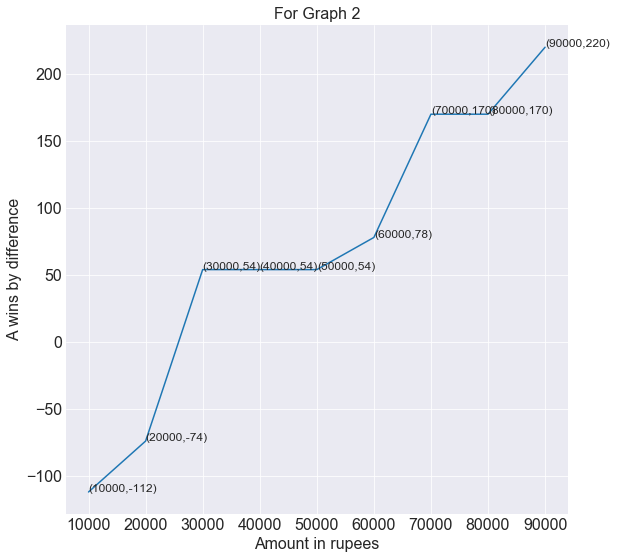

Minimum amount that can be spent for A to win elections in Graph 2 = 30000


In [24]:
#Doing for graph G2
k_amount = 0
x_cord = []
y_cord = []
no_of_iterations = 7
initial_G2 = networkx.Graph()
initial_G2 = copy.deepcopy(G2)
list_nodes_excluded = []
for it_cost in range(9):
    global_alternate = 'A'
    list_nodes_excluded = []
    G2 = copy.deepcopy(initial_G2)
    k_amount += 10000
    x_cord.append(k_amount)
    count_additional_voter = int(k_amount / 10000)
    for v in range(count_additional_voter):
        curr_voter = list_pairs_G2[v][0]
        G2.nodes[curr_voter]['support'] = 'A'
        list_nodes_excluded.append(curr_voter)
    
    #Now running the iterations of the decision period
    list_undecided = []
    for ab in range(0, count_total_nodes):
        cn = str(ab)
        if G2.nodes[cn]['support'] == 'U':
            list_undecided.append(cn)
    
    for it_cnt in range(no_of_iterations):
        for curr_node in list_undecided:
            list_neighbours = [n for n in G2.neighbors(curr_node)]
            list_supporting = [G2.nodes[x]['support'] for x in list_neighbours]
            cntr_supporting = Counter(list_supporting)
            count_A = cntr_supporting['A']
            count_B = cntr_supporting['B']
            if count_A > count_B:
                G2.nodes[curr_node]['support'] = 'A'
            elif count_B > count_A:
                G2.nodes[curr_node]['support'] = 'B'
            else:
                G2.nodes[curr_node]['support'] = global_alternate
                if global_alternate == 'A':
                    global_alternate = 'B'
                else:
                    global_alternate = 'A'

    list_all_supporting_1 = [G2.nodes[y]['support'] for y in G2.nodes()]
    counter_all_supporting_1 = Counter(list_all_supporting_1)
    cnt_A_1 = counter_all_supporting_1['A']
    cnt_B_1 = counter_all_supporting_1['B']
    difference_winning = cnt_A_1 - cnt_B_1
    y_cord.append(difference_winning)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (9, 9))
plt.title('For Graph 2', fontsize = 16) 
plt.plot(x_cord, y_cord)
combined_points = zip(x_cord, y_cord)
for x_val, y_val in combined_points:
    plt.text(x_val, y_val, '({},{})'.format(x_val,y_val), fontsize = 12)
plt.xlabel('Amount in rupees', fontsize = 16)
plt.ylabel('A wins by difference', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

for i in range(len(y_cord)):
    if y_cord[i] > 0:
        print(f"Minimum amount that can be spent for A to win elections in Graph 2 = {x_cord[i]}")
        break
        